<a href="https://colab.research.google.com/github/sadneya145/Data_Science_lab/blob/main/MBTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATASET**

Reference link: https://www.kaggle.com/code/akdagmelih/five-personality-clusters-k-means/notebook

Dataset link:
https://www.kaggle.com/datasets/tunguz/big-five-personality-test/data

Doc: https://docs.google.com/document/d/15AW-SkO3UU20suWZU-Ovjgc6K1YoLOuuhsqQVxPLRIs/edit?tab=t.0#heading=h.vmq3pzec3rsu


##**Steps to Build the Program**

1. Data Collection
2. Data Preprocessing
Load Data: Import dataset into a DataFrame (e.g., using pandas).
Clean Data: Handle missing values, remove any irrelevant columns (like personal identifiers).
Normalize Data: Standardize/scale the features to ensure fair clustering (use StandardScaler from sklearn).
Feature Selection: Choose relevant columns/features (e.g., Big Five traits, MBTI scores).
3. Feature Engineering
Convert MBTI to Binary: For clustering I vs. E and T vs. F, create binary columns (e.g., E/I, T/F).
Prepare the Feature Set: Use features like Extraversion, Agreeableness, Neuroticism, Conscientiousness, and Openness for clustering.
4. K-Means Clustering
Choose Number of Clusters: Set k=4 (for IT, IF, ET, EF clusters).
Apply K-Means: Use KMeans() from sklearn.cluster to fit the data.
Fit the Model: Train the model on your feature set.
Obtain Cluster Labels: Get the predicted cluster labels for each sample.
5. Cluster Analysis
Examine Centroids: Look at the centroids to understand the characteristics of each cluster.
Interpret Results: Compare the centroids with the expected MBTI traits for I vs. E and T vs. F.
6. Mapping Clusters to MBTI
Assign MBTI Labels: Based on the cluster centroids, assign the appropriate MBTI type (e.g., IT, IF, ET, EF).
Final Classification: Map each cluster label back to its corresponding MBTI combination.
7. Evaluation
Assess Accuracy: If you have a labeled dataset, compare the clusters' results to the actual MBTI types.
Use Silhouette Score: Measure cluster cohesion using the silhouette score to evaluate the quality of clustering.
8. Visualization
Visualize Clusters: Use PCA or t-SNE for dimensionality reduction and plot the clusters on a 2D plot for better understanding.
9. Final Prediction (For New Data)
Prediction: For new data, apply the same preprocessing steps and predict the MBTI type by assigning it to one of the clusters.
10. Model Deployment (Optional)
Deploy: If you want to deploy your model, create an API using Flask or FastAPI to serve the clustering model for MBTI prediction.



# **Preprocessing and loading dataset**

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

# Load the dataset
file_path = "data-final.csv"  # Change to your actual file path
df = pd.read_csv(file_path, sep="\t")  # Adjust separator if needed

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check column data types
print("\nColumn Data Types:")
print(df.dtypes)


First 5 rows of the dataset:


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17.0,2.0,KE,1.0,38.0



Column Data Types:
EXT1                       int64
EXT2                       int64
EXT3                       int64
EXT4                       int64
EXT5                       int64
                          ...   
endelapse                float64
IPC                      float64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object


In [ ]:
df = df.dropna()
df = df.apply(pd.to_numeric, errors='coerce')

# Feature Engineering: Calculate average scores for Extroversion & Agreeableness
extroversion_related = [f'EXT{i}' for i in range(1, 11)] + [f'OPN{i}' for i in range(1, 6)]
agreeableness_related = [f'AGR{i}' for i in range(1, 11)]

# Calculate new personality scores based on multiple factors
df['Extroversion_Score'] = df[extroversion_related].mean(axis=1)
df['Agreeableness_Score'] = df[agreeableness_related].mean(axis=1)

# Refined classification
df['Personality_IE'] = df['Extroversion_Score'].apply(lambda x: 'Introvert' if x < 3.0 else 'Extrovert')
df['Personality_TF'] = df['Agreeableness_Score'].apply(lambda x: 'Thinker' if x < 3.0 else 'Feeler')



# **Visualising data**

##EXTROVERSION ANALYSIS


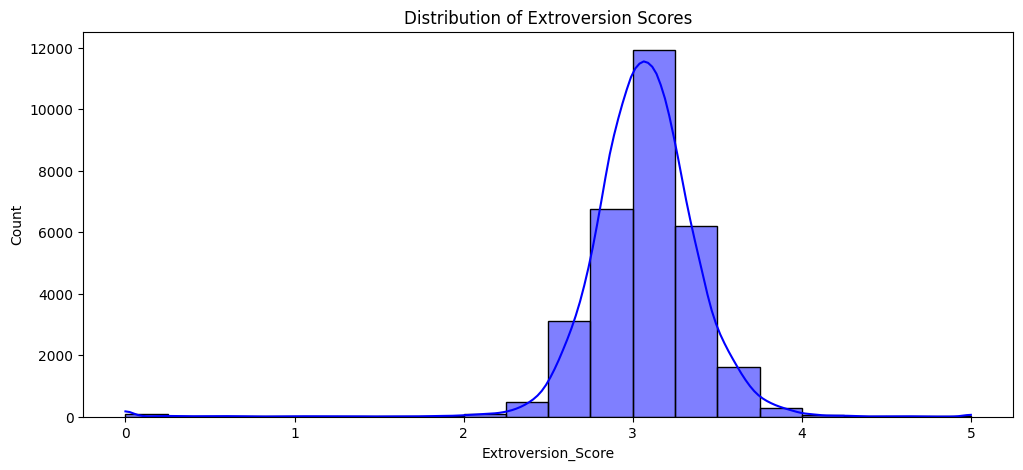

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(df['Extroversion_Score'], bins=20, kde=True, color='blue')
plt.title("Distribution of Extroversion Scores")
plt.show()

<ipython-input-4-c289916bed2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Personality_IE'], palette='coolwarm')


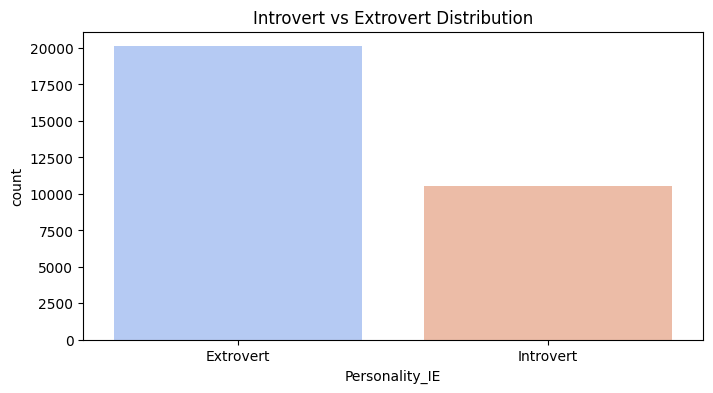

In [ ]:
# Personality Type Countplot (Introvert vs Extrovert)
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Personality_IE'], palette='coolwarm')
plt.title("Introvert vs Extrovert Distribution")
plt.show()

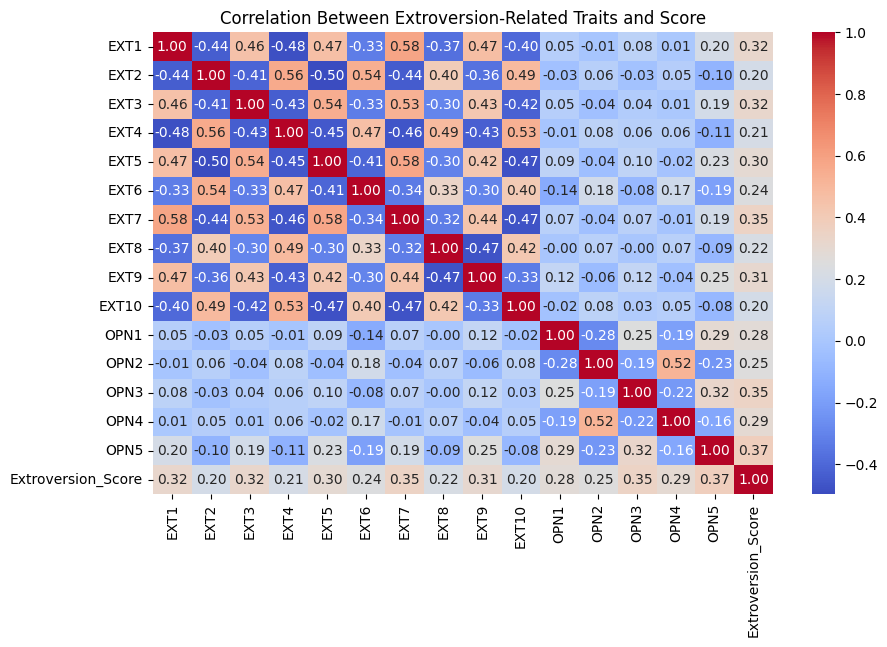

In [ ]:
# Correlation Heatmap - Extroversion (Now using multiple columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df[extroversion_related + ['Extroversion_Score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Extroversion-Related Traits and Score")
plt.show()


##AGREEABLENESS ANALYSIS


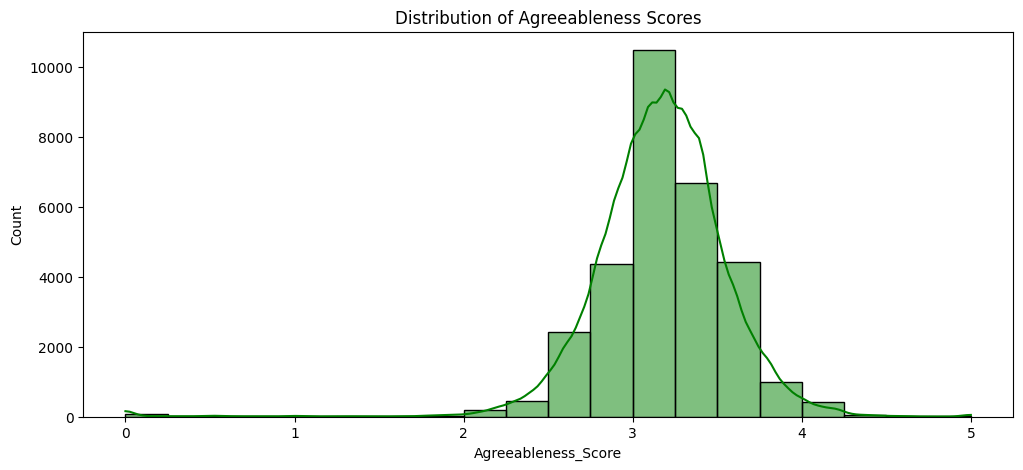

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Agreeableness_Score'], bins=20, kde=True, color='green')
plt.title("Distribution of Agreeableness Scores")
plt.show()

<ipython-input-7-04cb9a0a4317>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Personality_TF'], palette='viridis')


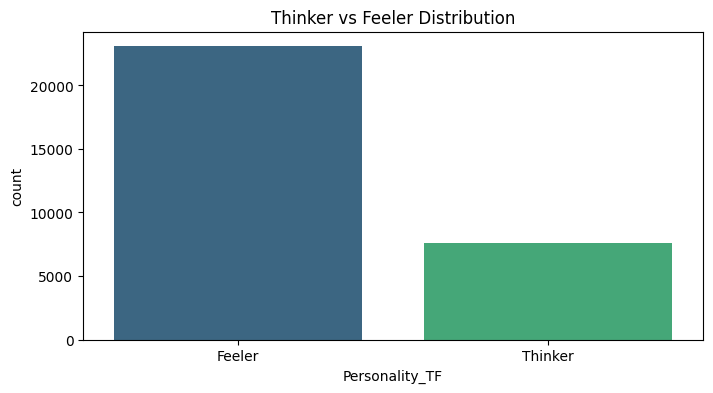

In [ ]:
# Personality Type Countplot (Thinker vs Feeler)
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Personality_TF'], palette='viridis')
plt.title("Thinker vs Feeler Distribution")
plt.show()

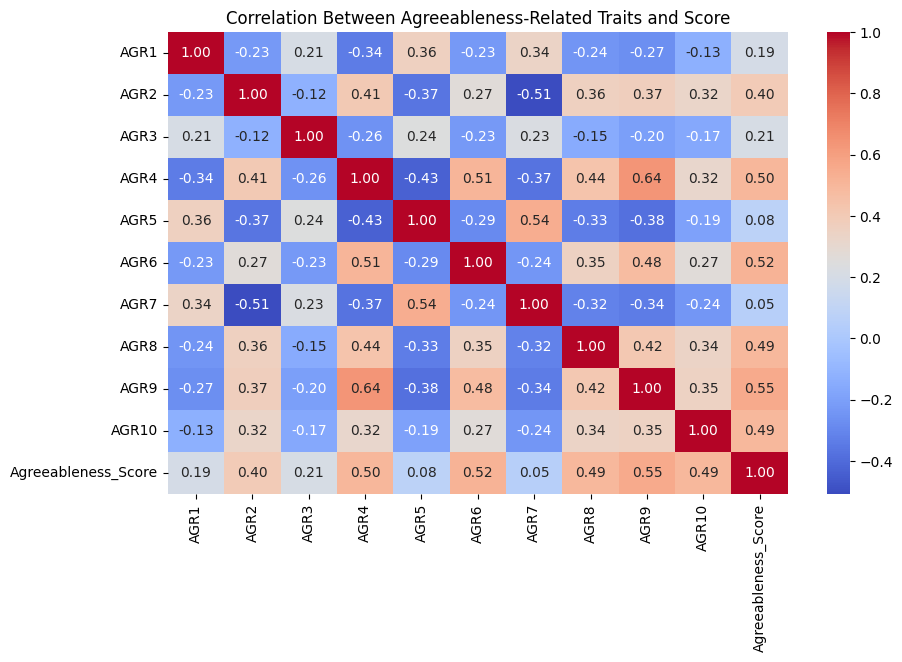

In [ ]:
# Correlation Heatmap - Agreeableness (Now using multiple columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df[agreeableness_related + ['Agreeableness_Score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Agreeableness-Related Traits and Score")
plt.show()


# **Decision Tree**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# Load dataset (assuming df is already cleaned and processed)
# Features for predicting Extroversion Score
X_ext = df[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10','OPN1','OPN2','OPN3','OPN4','OPN5']]
y_ext = df['Extroversion_Score']

# Features for predicting Agreeableness Score
X_agr = df[['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5','AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']]
y_agr = df['Agreeableness_Score']

# Split Data (80% Train, 20% Test)
X_ext_train, X_ext_test, y_ext_train, y_ext_test = train_test_split(X_ext, y_ext, test_size=0.2, random_state=42)
X_agr_train, X_agr_test, y_agr_train, y_agr_test = train_test_split(X_agr, y_agr, test_size=0.2, random_state=42)

# Train Decision Tree for Extroversion
tree_ext = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_ext.fit(X_ext_train, y_ext_train)

# Train Decision Tree for Agreeableness
tree_agr = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_agr.fit(X_agr_train, y_agr_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

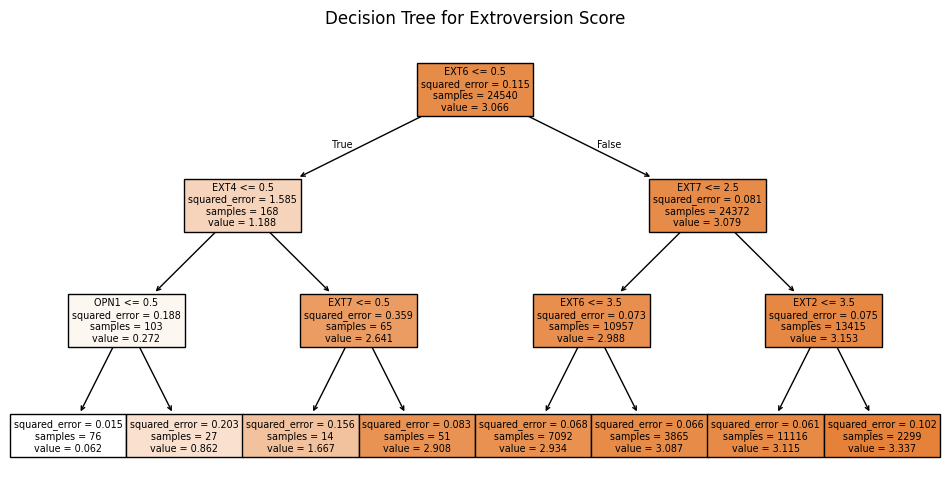

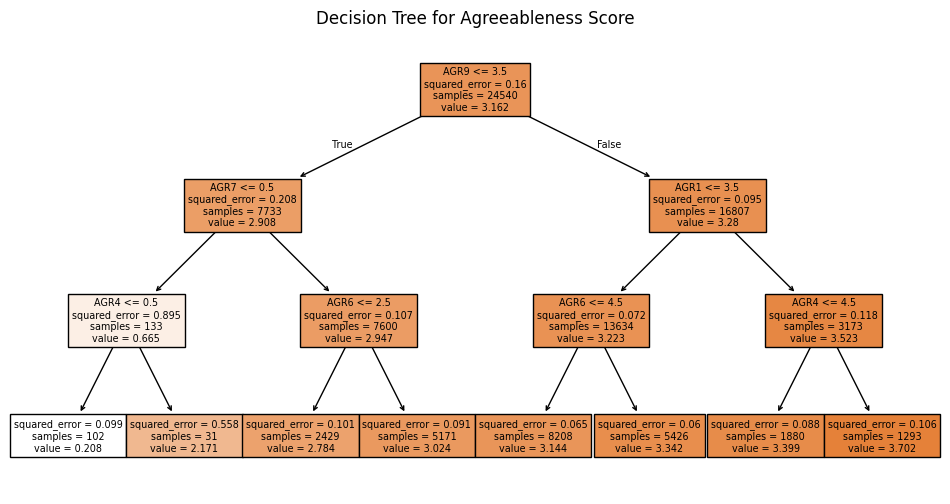

In [ ]:
# --- VISUALIZE DECISION TREE ---
plt.figure(figsize=(12, 6))
plot_tree(tree_ext, feature_names=X_ext.columns, filled=True)
plt.title("Decision Tree for Extroversion Score")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(tree_agr, feature_names=X_agr.columns, filled=True)
plt.title("Decision Tree for Agreeableness Score")
plt.show()

<ipython-input-12-1868837250ba>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_ext.columns, y=importance_ext, palette="coolwarm")


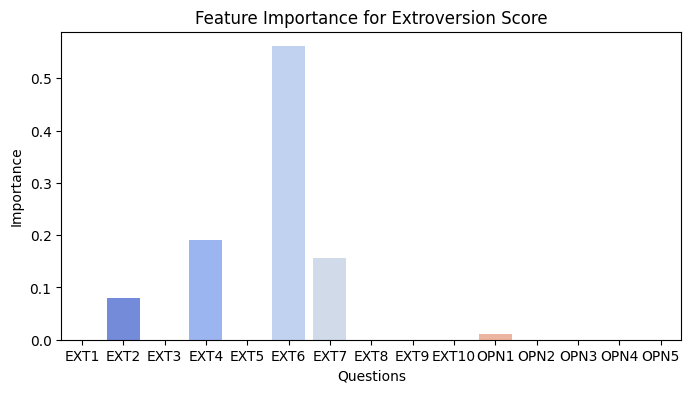

<ipython-input-12-1868837250ba>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_agr.columns, y=importance_agr, palette="viridis")


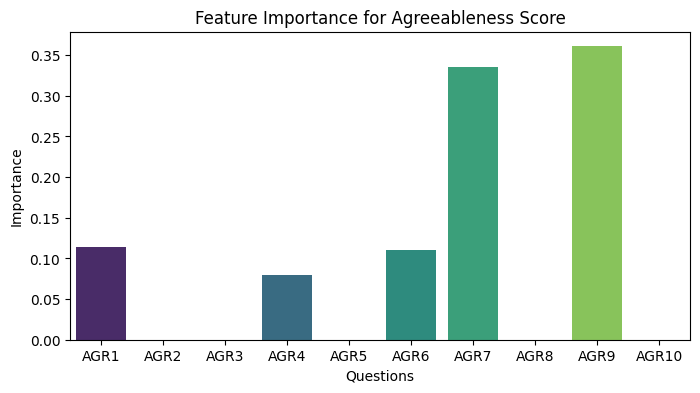

In [ ]:
# --- FEATURE IMPORTANCE ---
importance_ext = tree_ext.feature_importances_
importance_agr = tree_agr.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(8, 4))
sns.barplot(x=X_ext.columns, y=importance_ext, palette="coolwarm")
plt.title("Feature Importance for Extroversion Score")
plt.xlabel("Questions")
plt.ylabel("Importance")
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x=X_agr.columns, y=importance_agr, palette="viridis")
plt.title("Feature Importance for Agreeableness Score")
plt.xlabel("Questions")
plt.ylabel("Importance")
plt.show()

In [ ]:
# --- MODEL PERFORMANCE ---
y_ext_pred = tree_ext.predict(X_ext_test)
y_agr_pred = tree_agr.predict(X_agr_test)

mse_ext = mean_squared_error(y_ext_test, y_ext_pred)
mse_agr = mean_squared_error(y_agr_test, y_agr_pred)

print(f"Extroversion Model MSE: {mse_ext:.4f}")
print(f"Agreeableness Model MSE: {mse_agr:.4f}")

Extroversion Model MSE: 0.0718
Agreeableness Model MSE: 0.0810


## linear regression


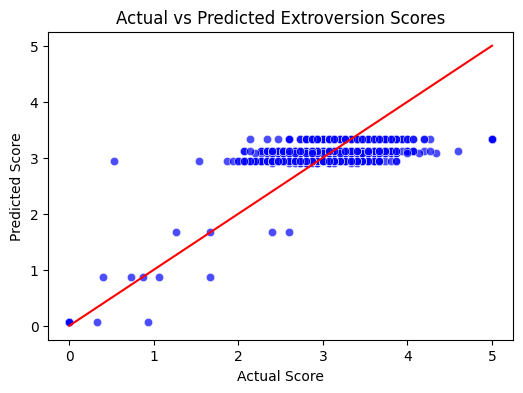

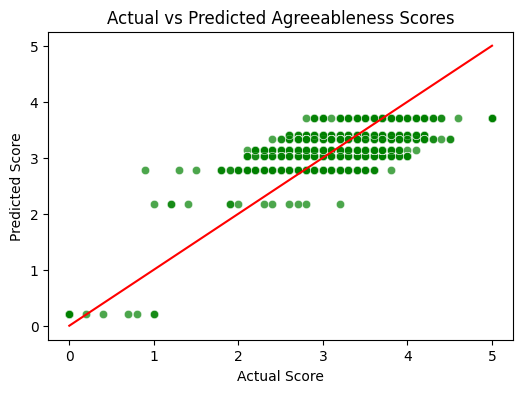

In [ ]:
# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_ext_test, y=y_ext_pred, alpha=0.7, color="blue")
plt.plot([min(y_ext_test), max(y_ext_test)], [min(y_ext_test), max(y_ext_test)], color='red')  # Line y=x
plt.title("Actual vs Predicted Extroversion Scores")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_agr_test, y=y_agr_pred, alpha=0.7, color="green")
plt.plot([min(y_agr_test), max(y_agr_test)], [min(y_agr_test), max(y_agr_test)], color='red')  # Line y=x
plt.title("Actual vs Predicted Agreeableness Scores")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()


# **k-means clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load your dataset (replace with actual dataset loading)
# df = pd.read_csv("your_data.csv")

# Updated features based on analysis
features = df[['AGR3', 'AGR4', 'AGR5', 'EXT3', 'EXT4']]

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


K-Means Clustering Scores:
Silhouette Score: 0.19818522688064558
Davies-Bouldin Score: 1.4665934893984367


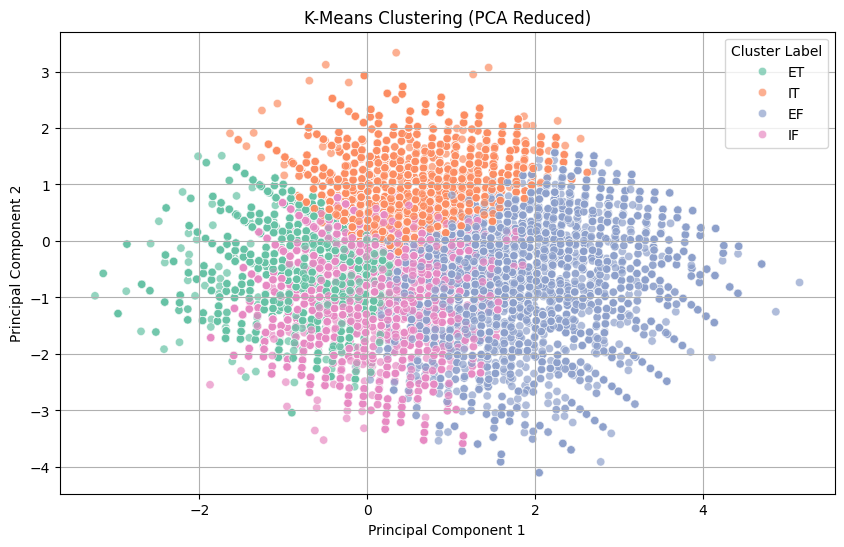

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(scaled_features, kmeans_labels)

print("K-Means Clustering Scores:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Score: {kmeans_davies_bouldin}")

# PCA for Visualization of K-Means
pca = PCA(n_components=2)
reduced_features_kmeans = pca.fit_transform(scaled_features)

df_kmeans = pd.DataFrame(reduced_features_kmeans, columns=['PC1', 'PC2'])
df_kmeans['Cluster'] = kmeans_labels
df_kmeans['Cluster Label'] = df_kmeans['Cluster'].map({0: 'IT', 1: 'IF', 2: 'ET', 3: 'EF'})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_kmeans, x='PC1', y='PC2', hue='Cluster Label', palette='Set2', alpha=0.7)
plt.title("K-Means Clustering (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster Label")
plt.grid()
plt.show()


GMM Clustering Scores:
Silhouette Score: 0.13199089098902947
Davies-Bouldin Score: 1.920164036423401


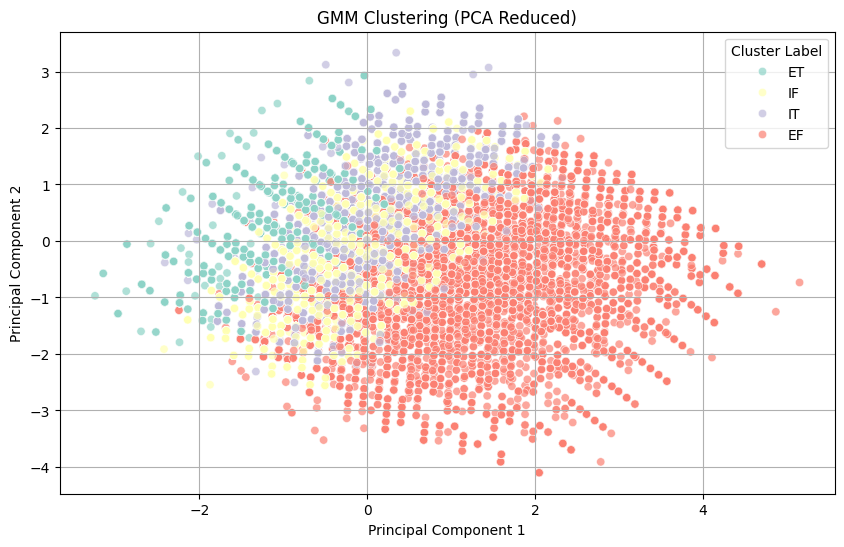

In [ ]:
# GMM Clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)
gmm_silhouette = silhouette_score(scaled_features, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(scaled_features, gmm_labels)

print("GMM Clustering Scores:")
print(f"Silhouette Score: {gmm_silhouette}")
print(f"Davies-Bouldin Score: {gmm_davies_bouldin}")

# PCA for Visualization of GMM
pca = PCA(n_components=2)
reduced_features_gmm = pca.fit_transform(scaled_features)

df_gmm = pd.DataFrame(reduced_features_gmm, columns=['PC1', 'PC2'])
df_gmm['Cluster'] = gmm_labels
df_gmm['Cluster Label'] = df_gmm['Cluster'].map({0: 'IT', 1: 'IF', 2: 'ET', 3: 'EF'})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gmm, x='PC1', y='PC2', hue='Cluster Label', palette='Set3', alpha=0.7)
plt.title("GMM Clustering (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster Label")
plt.grid()
plt.show()


#**test for prediction**

In [ ]:
# 1. Create a Machine Learning model to predict personality types
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features (questions) and targets
# Let's use the original EXT and AGR questions as features
extroversion_questions = [f'EXT{i}' for i in range(1, 11)]
agreeableness_questions = [f'AGR{i}' for i in range(1, 11)]
all_features = extroversion_questions + agreeableness_questions

# Define targets
X = df[all_features]
y_ie = df['Personality_IE']
y_tf = df['Personality_TF']

# Split data
X_train, X_test, y_train_ie, y_test_ie = train_test_split(X, y_ie, test_size=0.3, random_state=42)
_, _, y_train_tf, y_test_tf = train_test_split(X, y_tf, test_size=0.3, random_state=42)

# Train models
ie_model = RandomForestClassifier(n_estimators=100, random_state=42)
ie_model.fit(X_train, y_train_ie)

tf_model = RandomForestClassifier(n_estimators=100, random_state=42)
tf_model.fit(X_train, y_train_tf)

# Evaluate models
ie_predictions = ie_model.predict(X_test)
tf_predictions = tf_model.predict(X_test)

print("Introvert/Extrovert Model Accuracy:", accuracy_score(y_test_ie, ie_predictions))
print("Thinker/Feeler Model Accuracy:", accuracy_score(y_test_tf, tf_predictions))

# Find most important features (questions) for each model
ie_importances = ie_model.feature_importances_
tf_importances = tf_model.feature_importances_

ie_feature_imp = pd.DataFrame({'Feature': all_features, 'Importance': ie_importances})
tf_feature_imp = pd.DataFrame({'Feature': all_features, 'Importance': tf_importances})

# Sort by importance
ie_feature_imp = ie_feature_imp.sort_values('Importance', ascending=False)
tf_feature_imp = tf_feature_imp.sort_values('Importance', ascending=False)

# Print top 5 most important questions for each model
print("\nTop 5 questions for Introvert/Extrovert prediction:")
print(ie_feature_imp.head(5))

print("\nTop 5 questions for Thinker/Feeler prediction:")
print(tf_feature_imp.head(5))

Introvert/Extrovert Model Accuracy: 0.808975334130175
Thinker/Feeler Model Accuracy: 0.9246984678909052

Top 5 questions for Introvert/Extrovert prediction:
  Feature  Importance
0    EXT1    0.077777
6    EXT7    0.076811
8    EXT9    0.064403
1    EXT2    0.061742
3    EXT4    0.060038

Top 5 questions for Thinker/Feeler prediction:
   Feature  Importance
18    AGR9    0.121887
15    AGR6    0.110284
12    AGR3    0.079595
19   AGR10    0.078704
13    AGR4    0.075679


In [ ]:
# 2. Create a function to predict personality type based on quiz responses
def predict_personality(responses):
    """
    Predict personality type based on quiz responses.

    Parameters:
    responses (dict): Dictionary with question keys and response values (1-5 scale)

    Returns:
    tuple: (ie_prediction, tf_prediction) - Introvert/Extrovert and Thinker/Feeler predictions
    """
    # Convert responses to features array
    features = []
    for q in all_features:
        features.append(responses.get(q, 3))  # Default to 3 if question not answered

    features = np.array(features).reshape(1, -1)

    # Predict personality types
    ie_type = ie_model.predict(features)[0]
    tf_type = tf_model.predict(features)[0]

    return ie_type, tf_type

# 3. Create a simple quiz interface
def run_personality_quiz():
    print("Welcome to the Personality Quiz!")
    print("Please rate how much you agree with each statement (1-5):")
    print("1 = Strongly Disagree, 5 = Strongly Agree")

    responses = {}

    # Use the top 5 questions from each model
    important_questions = list(ie_feature_imp.head(5)['Feature']) + list(tf_feature_imp.head(5)['Feature'])
    important_questions = list(set(important_questions))  # Remove duplicates

    # Question text mapping (replace with actual questions from your dataset)
    question_text = {
        'EXT1': "I am the life of the party.",
        'EXT2': "I feel comfortable around people.",
        'EXT3': "I feel comfortable around people.",
        'EXT4': "I keep in the background.",
        "EXT5": "I start conversations.",
        "EXT6": "I have little to say.",
        "EXT7": "I talk to a lot of different people at parties.",
        "EXT8": "I don't like to draw attention to myself.",
        "EXT9": "I don't mind being the center of attention.",
        "EXT10": "I am quiet around strangers.",
        "AGR1": "I feel others' emotions.",
        "AGR2": "I make people feel at ease.",
        "AGR3": "I sympathize with others' feelings.",
        "AGR4": "I take time out for others.",
        "AGR5": "I am interested in people.",
        "AGR6": "I insult people.",
        "AGR7": "I am not interested in other people's problems.",
        "AGR8": "I feel little concern for others.",
        "AGR9": "I am not really interested in others.",
        "AGR10": "I am hard to get to know."
    }

    for q in important_questions:
        if q in question_text:
            text = question_text[q]
        else:
            text = f"Question {q}"

        while True:
            try:
                answer = int(input(f"{text} (1-5): "))
                if 1 <= answer <= 5:
                    responses[q] = answer
                    break
                else:
                    print("Please enter a number between 1 and 5.")
            except ValueError:
                print("Please enter a valid number.")

    # Predict personality
    ie_type, tf_type = predict_personality(responses)

    print("\nYour predicted personality type:")
    print(f"You are an {ie_type} and a {tf_type}!")

    # Add personality descriptions here

# Run the quiz
run_personality_quiz()

Welcome to the Personality Quiz!
Please rate how much you agree with each statement (1-5):
1 = Strongly Disagree, 5 = Strongly Agree
I sympathize with others' feelings. (1-5): 5
I take time out for others. (1-5): 5
I am hard to get to know. (1-5): 1
I insult people. (1-5): 1
I am not really interested in others. (1-5): 1
I am the life of the party. (1-5): 5
I talk to a lot of different people at parties. (1-5): 5
I don't mind being the center of attention. (1-5): 5
I feel comfortable around people. (1-5): 5
I keep in the background. (1-5): 1

Your predicted personality type:
You are an Extrovert and a Thinker!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# link : https://claude.ai/share/f3a2a150-a098-4c44-bb3f-89d99cf75c72

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import GridspecLayout, Layout, Button, HTML

# QUIZ QUESTIONS AND PROCESSING

# Extraversion questions
extraversion_questions = [
    "I am the life of the party.",
    "I talk a lot.",
    "I feel comfortable around people.",
    "I start conversations.",
    "I talk to a lot of different people at parties.",
    "I like to draw attention to myself.",
    "I don't mind being the center of attention.",
    "I am friendly with strangers."
]

# Thinking/Feeling questions - you could add these based on your requirements
thinking_feeling_questions = [
    "I value logic over feelings when making decisions.",
    "I am more concerned with being fair than being liked.",
    "I prefer objective analysis over personal considerations.",
    "I tend to focus on facts rather than people's feelings.",
    "I consider myself an analytical thinker.",
    "I value justice over harmony in my relationships",
    "I make decisions with my head more than my heart.",
    "I make my decision based on justice over how it will affect others' feelings.",
    "I prioritize logic in my interactions."
]

# Combined questions dictionary
personality_questions = {
    f"EXT{i+1}": {"text": q, "reverse": i % 2 != 0} for i, q in enumerate(extraversion_questions)
}
personality_questions.update({
    f"TF{i+1}": {"text": q, "reverse": i < 5} for i, q in enumerate(thinking_feeling_questions)
})

# Create a quiz using IPython widgets
def create_personality_quiz():
    """Create and display an interactive personality quiz using ipywidgets"""

    # Store answers
    answers = {}

    # Create a function to handle button clicks
    def on_button_clicked(feature_id, value, btn):
        # Store the answer
        answers[feature_id] = value

        # Update button styles for this question
        for i in range(1, 6):
            question_buttons[feature_id][i-1].style.button_color = 'lightgray'
        btn.style.button_color = 'lightblue'

    # Create quiz layout
    quiz_layout = widgets.VBox([])
    question_buttons = {}

    # Add header
    header = widgets.HTML(value="<h2>Personality Type Quiz</h2><p>Rate how much you agree with each statement:</p>")
    quiz_layout.children = quiz_layout.children + (header,)

    # Create question widgets
    for feature_id, question_data in personality_questions.items():
        question_text = question_data["text"]

        # Create question label
        q_label = widgets.HTML(value=f"<p><b>{feature_id}:</b> {question_text}</p>")

        # Create scale buttons (1-5)
        scale_labels = widgets.HTML(value="<div style='display: flex; justify-content: space-between; width: 400px;'>"
                                 "<span>Strongly<br>Disagree</span>"
                                 "<span>Disagree</span>"
                                 "<span>Neutral</span>"
                                 "<span>Agree</span>"
                                 "<span>Strongly<br>Agree</span></div>")

        button_layout = widgets.Layout(width='70px', height='50px')
        buttons = [widgets.Button(description=str(i), layout=button_layout, style={'button_color': 'lightgray'})
                   for i in range(1, 6)]

        # Store buttons for this question
        question_buttons[feature_id] = buttons

        # Set up button callbacks
        for i, btn in enumerate(buttons, 1):
            btn.on_click(lambda b, fid=feature_id, val=i, btn=btn: on_button_clicked(fid, val, btn))

        # Create a container for buttons
        button_box = widgets.HBox(buttons)

        # Add question and buttons to layout
        question_box = widgets.VBox([q_label, scale_labels, button_box, widgets.HTML("<hr>")])
        quiz_layout.children = quiz_layout.children + (question_box,)

    # Add submit button
    submit_button = widgets.Button(
        description='Submit Quiz',
        button_style='success',
        layout=widgets.Layout(width='200px', height='50px')
    )

    result_output = widgets.Output()

    def on_submit_clicked(b):
        # Check if all questions are answered
        if len(answers) < len(personality_questions):
            with result_output:
                clear_output()
                print(f"Please answer all {len(personality_questions)} questions. "
                      f"You have answered {len(answers)} so far.")
            return

        # Process answers
        with result_output:
            clear_output()
            print("Processing your responses...")

            # Convert answers to DataFrame
            user_data = process_quiz_answers(answers)

            # Identify personality type
            personality_type = identify_personality_type(user_data)

            # Display results
            display_personality_results(personality_type)

    submit_button.on_click(on_submit_clicked)

    # Add submit button and result output to layout
    quiz_layout.children = quiz_layout.children + (submit_button, result_output)

    return quiz_layout, answers

def process_quiz_answers(answers):
    """Process quiz answers, accounting for reverse-scored items"""

    processed_answers = {}

    for feature_id, answer_value in answers.items():
        # Reverse scoring if needed
        if personality_questions[feature_id]["reverse"]:
            processed_answers[feature_id] = 6 - answer_value  # 5 becomes 1, 4 becomes 2, etc.
        else:
            processed_answers[feature_id] = answer_value

    # Convert to DataFrame
    user_data = pd.DataFrame([processed_answers])

    return user_data

# PERSONALITY TYPE IDENTIFICATION

def calculate_trait_scores(user_data):
    """Calculate overall scores for each personality trait"""

    # Calculate extraversion score (mean of EXT items)
    ext_cols = [col for col in user_data.columns if col.startswith('EXT')]
    user_data['extraversion_score'] = user_data[ext_cols].mean(axis=1)

    # Calculate thinking/feeling score (mean of TF items)
    tf_cols = [col for col in user_data.columns if col.startswith('TF')]
    user_data['thinking_score'] = user_data[tf_cols].mean(axis=1)

    return user_data

def identify_personality_type(user_data):
    """Identify personality type based on trait scores"""

    # Calculate trait scores
    user_data = calculate_trait_scores(user_data)

    # Determine personality type
    extraversion_score = user_data['extraversion_score'].values[0]
    thinking_score = user_data['thinking_score'].values[0]

    # Classify as E/I (using midpoint of scale: 3)
    ei_type = 'E' if extraversion_score > 3 else 'I'

    # Classify as T/F (using midpoint of scale: 3)
    tf_type = 'T' if thinking_score > 3 else 'F'

    # Combine to get personality type
    personality_type = ei_type + tf_type

    # Add scores to type info
    type_info = {
        'type': personality_type,
        'extraversion_score': extraversion_score,
        'thinking_score': thinking_score,
        'extraversion_percentile': (extraversion_score - 1) / 4 * 100,  # Convert to 0-100 scale
        'thinking_percentile': (thinking_score - 1) / 4 * 100  # Convert to 0-100 scale
    }

    return type_info

def display_personality_results(type_info):
    """Display personality type and descriptions"""

    personality_type = type_info['type']

    # Type descriptions - improved descriptions for the simplified model
    type_descriptions = {
        'IT': "Introverted Thinker: You are analytical, reserved, and logical. You prefer solitude and make decisions based on rational analysis rather than emotions. You likely enjoy deep thinking and intellectual challenges. You excel at solving complex problems and value precision in communication.",

        'IF': "Introverted Feeler: You are reflective, empathetic, and values-driven. While you enjoy your alone time, you deeply care about others and make decisions based on personal values and how they affect people. You have rich inner emotional lives and are often driven by a desire for authenticity and meaningful connections.",

        'ET': "Extraverted Thinker: You are assertive, energetic, and logical. You enjoy social interactions and approach problems analytically. You're likely decisive and action-oriented. You excel at organizing people and systems efficiently, and typically prefer to lead rather than follow.",

        'EF': "Extraverted Feeler: You are outgoing, empathetic, and people-focused. You gain energy from social interactions and prioritize harmony and others' feelings in your decision-making. You build communities naturally and excel at motivating others through your enthusiasm and genuine interest in their wellbeing."
    }

    # Get description for this type
    description = type_descriptions.get(personality_type, "Undefined type")

    # Create a nice display
    print(f"\n🎉 Your Personality Type: {personality_type} 🎉\n")
    print(description)
    print("\nTrait Scores:")
    print(f"Extraversion: {type_info['extraversion_score']:.2f}/5 ({type_info['extraversion_percentile']:.0f}%)")
    print(f"Thinking: {type_info['thinking_score']:.2f}/5 ({type_info['thinking_percentile']:.0f}%)")

    # Visualization of scores
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Create a simple chart
    traits = ['Extraversion', 'Thinking']
    scores = [type_info['extraversion_percentile'], type_info['thinking_percentile']]
    opposite_traits = ['Introversion', 'Feeling']
    opposite_scores = [100 - score for score in scores]

    # Create positions for bars
    x = np.arange(len(traits))
    width = 0.35

    # Plot bars
    ax.barh(x + width/2, scores, width, label='Your Score', color='#3498db')
    ax.barh(x - width/2, opposite_scores, width, label='Opposite Trait', color='#e74c3c')

    # Add horizontal line at 50%
    ax.axvline(x=50, color='gray', linestyle='--', alpha=0.7)

    # Add trait labels
    ax.set_yticks(x)
    ax.set_yticklabels(traits)
    ax.set_xlim(0, 100)
    ax.set_xlabel('Score Percentile')
    ax.set_title(f'Your {personality_type} Personality Profile')

    # Add text labels for scores
    for i, score in enumerate(scores):
        ax.text(score + 3, i + width/2, f"{score:.0f}%", va='center')
        ax.text(opposite_scores[i] + 3, i - width/2, f"{opposite_scores[i]:.0f}%", va='center')

    # Add text to show which letter is dominant
    for i, (score, trait, opposite_trait) in enumerate(zip(scores, traits, opposite_traits)):
        dominant = trait[0] if score > 50 else opposite_trait[0]
        ax.text(101, i, f"→ {dominant} is dominant", va='center')

    plt.legend()
    plt.tight_layout()
    plt.show()

def cluster_personality_types(user_dataset, n_clusters=4):
    """Use clustering to identify personality types in a dataset of users"""

    # Extract personality trait features
    ext_cols = [col for col in user_dataset.columns if col.startswith('EXT')]
    tf_cols = [col for col in user_dataset.columns if col.startswith('TF')]

    features = ext_cols + tf_cols

    # Scale the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(user_dataset[features])

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Apply GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_features)

    # Add cluster labels to dataset
    user_dataset['kmeans_cluster'] = cluster_labels
    user_dataset['gmm_cluster'] = gmm_labels

    # Calculate trait scores
    for i in range(len(user_dataset)):
        user_data = user_dataset.iloc[[i]]
        user_data = calculate_trait_scores(user_data)
        user_dataset.loc[user_data.index, 'extraversion_score'] = user_data['extraversion_score'].values
        user_dataset.loc[user_data.index, 'thinking_score'] = user_data['thinking_score'].values

    # Interpret clusters
    kmeans_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)

    # Calculate trait scores for each cluster center
    for i in range(len(kmeans_centers)):
        center_data = kmeans_centers.iloc[[i]]
        ext_score = center_data[ext_cols].mean(axis=1).values[0]
        tf_score = center_data[tf_cols].mean(axis=1).values[0]

        kmeans_centers.loc[i, 'extraversion_score'] = ext_score
        kmeans_centers.loc[i, 'thinking_score'] = tf_score

        # Assign personality types
        ei_type = 'E' if ext_score > 3 else 'I'
        tf_type = 'T' if tf_score > 3 else 'F'
        kmeans_centers.loc[i, 'personality_type'] = ei_type + tf_type

    # Map clusters to personality types
    cluster_type_map = kmeans_centers['personality_type'].to_dict()
    user_dataset['personality_type'] = user_dataset['kmeans_cluster'].map(cluster_type_map)

    return user_dataset, kmeans, kmeans_centers, cluster_type_map

def visualize_personality_clusters(user_dataset, kmeans_centers):
    """Visualize personality clusters"""

    # Use PCA for visualization
    features = [col for col in user_dataset.columns if col.startswith('EXT') or col.startswith('TF')]

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(user_dataset[features])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'PC1': pca_result[:, 0],
        'PC2': pca_result[:, 1],
        'Cluster': user_dataset['kmeans_cluster'],
        'Type': user_dataset['personality_type']
    })

    # Plot
    plt.figure(figsize=(10, 8))

    # Plot points
    sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Type', style='Type',
                   palette='Set1', s=80, alpha=0.7)

    # Plot cluster centers
    pca_centers = pca.transform(kmeans_centers[features])
    for i, (x, y) in enumerate(pca_centers):
        personality_type = kmeans_centers.loc[i, 'personality_type']
        plt.scatter(x, y, s=200, marker='*', color='black', edgecolor='white', linewidth=1.5)
        plt.annotate(personality_type, (x, y), fontsize=14, fontweight='bold',
                    ha='center', va='center', color='white')

    plt.title('Personality Type Clusters', fontsize=16)
    plt.xlabel(f'Principal Component 1 (Explains {pca.explained_variance_ratio_[0]:.1%} of variance)')
    plt.ylabel(f'Principal Component 2 (Explains {pca.explained_variance_ratio_[1]:.1%} of variance)')
    plt.legend(title='Personality Type')
    plt.grid(alpha=0.3)

    plt.show()

    # Also create a 2D plot of extraversion vs thinking scores
    plt.figure(figsize=(10, 8))

    sns.scatterplot(data=user_dataset, x='extraversion_score', y='thinking_score',
                   hue='personality_type', style='personality_type', palette='Set1', s=80, alpha=0.7)

    # Add cluster centers
    for i in range(len(kmeans_centers)):
        x = kmeans_centers.loc[i, 'extraversion_score']
        y = kmeans_centers.loc[i, 'thinking_score']
        personality_type = kmeans_centers.loc[i, 'personality_type']
        plt.scatter(x, y, s=200, marker='*', color='black', edgecolor='white', linewidth=1.5)
        plt.annotate(personality_type, (x, y), fontsize=14, fontweight='bold',
                    ha='center', va='center', color='white')

    # Add quadrant lines
    plt.axhline(y=3, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=3, color='gray', linestyle='--', alpha=0.5)

    # Add quadrant labels
    plt.text(1.5, 4.5, 'Introverted Thinker (IT)', ha='center', fontsize=12)
    plt.text(1.5, 1.5, 'Introverted Feeler (IF)', ha='center', fontsize=12)
    plt.text(4.5, 4.5, 'Extraverted Thinker (ET)', ha='center', fontsize=12)
    plt.text(4.5, 1.5, 'Extraverted Feeler (EF)', ha='center', fontsize=12)

    plt.title('Personality Dimensions', fontsize=16)
    plt.xlabel('Extraversion Score')
    plt.ylabel('Thinking Score')
    plt.xlim(1, 5)
    plt.ylim(1, 5)
    plt.legend(title='Personality Type')
    plt.grid(alpha=0.3)

    plt.show()

# SAMPLE USAGE

# For a single user quiz:
quiz_layout, answers = create_personality_quiz()
display(quiz_layout)

# For multiple users (with existing data):
# user_dataset = pd.read_csv('user_responses.csv')  # Load existing user data
# results = cluster_personality_types(user_dataset)
# user_dataset_with_types, kmeans_model, cluster_centers, type_map = results
# visualize_personality_clusters(user_dataset_with_types, cluster_centers)